In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
text_data = pd.read_csv("D:/Datasets/Spooky Author Identification/train.csv")

In [3]:
text_data["author_label"] = text_data.author.map({'EAP':0,'HPL':1,'MWS':2})

In [4]:
print(text_data.shape)

(19579, 4)


In [23]:
text_data.head()

,id,text,author,author_label
0,id26305,"This process, however, afforded me no means of...",EAP,0
1,id17569,It never once occurred to me that the fumbling...,HPL,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1


In [22]:
text_data.groupby('author').count()

,id,text,author_label
author,,,
EAP,7900,7900,7900
HPL,5635,5635,5635
MWS,6044,6044,6044


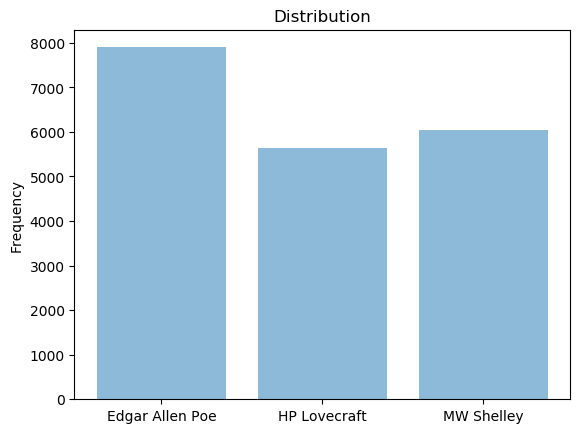

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
objects = ('Edgar Allen Poe', 'HP Lovecraft', 'MW Shelley')
y_pos = np.arange(len(objects))
performance = [7900,5635,6044]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Distribution')
 
plt.show()

In [5]:
X = text_data.text
y = text_data.author_label

In [6]:
vec = CountVectorizer()
vec.fit(X)
#print(X)
train_matrix = vec.transform(X)
#print(train_matrix)
train_df = pd.DataFrame(train_matrix.toarray(), columns=vec.get_feature_names())

In [7]:
print(train_df.shape)

(19579, 25068)


In [23]:
#print(train_df)

In [38]:
from time import time
t0 = time()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.20,random_state = 2)
print("Completed in %0.3fs" % (time() - t0))

Completed in 10.811s


In [39]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
t0 = time()
mnb.fit(X_train,y_train);
print("Completed in %0.3fs" % (time() - t0))

Completed in 15.656s


In [44]:
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.84576098059244131

In [71]:
from sklearn.model_selection import cross_val_score
cv_scores_mnb = cross_val_score(mnb, train_df, y, cv=5, scoring="accuracy")
print(cv_scores_mnb)

[ 0.84397344  0.83707865  0.83886619  0.84269663  0.83805875]


In [12]:
cross_val_score(mnb, train_df, y, cv=5, scoring="accuracy")

array([ 0.84397344,  0.83707865,  0.83886619,  0.84269663,  0.83805875])

In [13]:
#70/30 Split
from time import time
t0 = time()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.30,random_state = 2)
print("Completed in %0.3fs" % (time() - t0))

Completed in 8.983s


In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
t0 = time()
mnb.fit(X_train,y_train);
print("Completed in %0.3fs" % (time() - t0))

Completed in 17.649s


In [15]:
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.84218590398365678

In [16]:
#60/40 Split
from time import time
t0 = time()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.40,random_state = 2)
print("Completed in %0.3fs" % (time() - t0))
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
t0 = time()
mnb.fit(X_train,y_train);
print("Completed in %0.3fs" % (time() - t0))
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Completed in 14.215s
Completed in 7.349s


0.83414198161389175

In [17]:
#50/50 Split
from time import time
t0 = time()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.50,random_state = 2)
print("Completed in %0.3fs" % (time() - t0))
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
t0 = time()
mnb.fit(X_train,y_train);
print("Completed in %0.3fs" % (time() - t0))
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Completed in 12.722s
Completed in 1.846s


0.82696629213483142

In [59]:
#90/10 Split
from time import time
t0 = time()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.10,random_state = 2)
print("Completed in %0.3fs" % (time() - t0))
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
t0 = time()
mnb.fit(X_train,y_train);
print("Completed in %0.3fs" % (time() - t0))
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Completed in 33.340s
Completed in 26.207s


0.85750766087844743

In [61]:
#85/15 Split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.15,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.84950629894450114

In [64]:
#75/25 Split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.25,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.84228804902962207

In [63]:
#65/35 Split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.35,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.83992412082299728

In [65]:
#55/45 Split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.45,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.83021223470661676

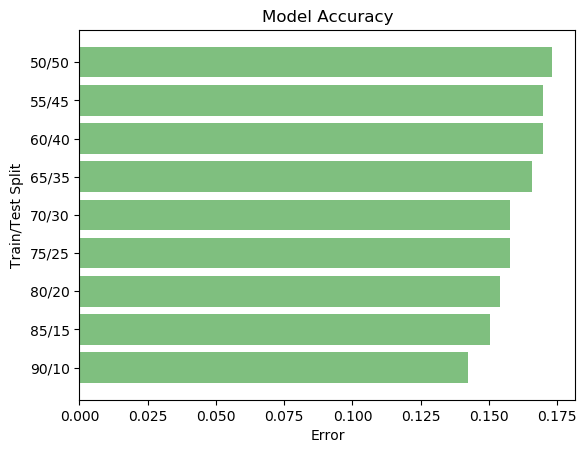

In [66]:
#Plot for Accuracy Scores

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
objects = ('90/10',
           '85/15','80/20',
           '75/25','70/30',
           '65/35','60/40',
           '55/45','50/50')
y_pos = np.arange(len(objects))
performance = [1 - 0.85750766087844743,
               1 - 0.84950629894450114,1 - 0.84576098059244131,
               1 - 0.84228804902962207,1 - 0.84218590398365678,
               1 - 0.83414198161389175,1 - 0.8302122347066167,
               1 - 0.83021223470661676,1 - 0.82696629213483142]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color="g")
plt.yticks(y_pos, objects)
plt.ylabel('Train/Test Split')
plt.xlabel('Error')
plt.title('Model Accuracy')
 
plt.show()

In [67]:
#Without Stop words
vec = CountVectorizer(stop_words="english")
vec.fit(X)
#print(X)
train_matrix = vec.transform(X)
#print(train_matrix)
train_df = pd.DataFrame(train_matrix.toarray(), columns=vec.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.20,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.82686414708886624

In [68]:
#Without Stop words
vec = CountVectorizer()
vec.fit(X)
#print(X)
train_matrix = vec.transform(X)
#print(train_matrix)
train_df = pd.DataFrame(train_matrix.toarray(), columns=vec.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.20,random_state = 2)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.84576098059244131

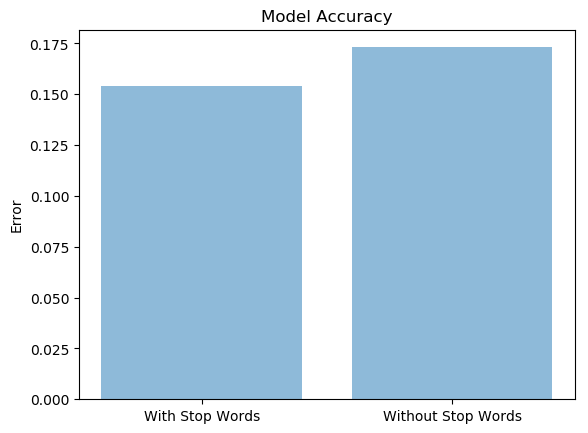

In [70]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
objects = ('With Stop Words', 'Without Stop Words')
y_pos = np.arange(len(objects))
performance = [1 - 0.84576098059244131,1 - 0.82686414708886624]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('Model Accuracy')
 
plt.show()